## Observations and Insights 

In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr

In [152]:
# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [153]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ID_Time = merged_df[["Mouse ID","Timepoint"]]
ID_Time

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [154]:
# Checking the number of mice.
Mouse_list = mouse_metadata["Mouse ID"].unique()
print(f"Total number of mice: {len(Mouse_list)}")

Total number of mice: 249


In [155]:
duplicates = ID_Time[ID_Time.duplicated(subset=None, keep="first")]
duplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [156]:
index = duplicates.index
index

Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [157]:
headers = list(merged_df.columns)
headers

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [158]:
# Optional: Get all the data for the duplicate mouse ID. 
dups = pd.DataFrame(merged_df,index,headers)
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [159]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop_duplicates(["Mouse ID","Timepoint"],inplace = True)
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [160]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(merged_df["Mouse ID"].unique())
print(f'Total number of mice: {mouse_count}')

Total number of mice: 249


## Summary Statistics

In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = merged_df.groupby(["Drug Regimen"]).mean()
mean_TV = mean["Tumor Volume (mm3)"]

median = merged_df.groupby(["Drug Regimen"]).median()
median_TV = median["Tumor Volume (mm3)"]

var = merged_df.groupby(["Drug Regimen"]).var()
var_TV = var["Tumor Volume (mm3)"]

std = merged_df.groupby(["Drug Regimen"]).std()
std_TV = std["Tumor Volume (mm3)"]

SEM = merged_df.groupby(["Drug Regimen"]).sem()
SEM_TV = SEM["Tumor Volume (mm3)"]

stats_sum = pd.DataFrame({"Mean": mean_TV,
                         "Median": median_TV,
                         "Variance": var_TV,
                         "Standard Deviation":std_TV,
                         "SEM": SEM_TV})
                         

stats_sum
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [162]:
# Using the aggregation method, produce the same summary statistics in a single line
agg = merged_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [163]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_df1 = merged_df.groupby("Drug Regimen").count()
timepoints_df1["Timepoint"]

# timepoint_count = merged_df["Timepoint"].value_counts()
# timepoint_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Text(0.5, 1.0, 'number of timepoint by drug regimen')

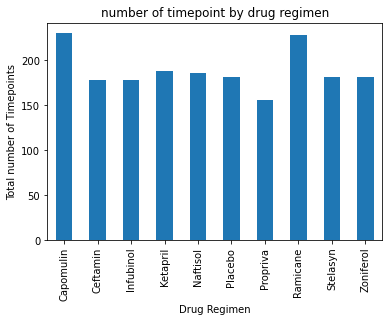

In [164]:
timepoints_df1["Timepoint"].plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Timepoints")
plt.title("number of timepoint by drug regimen")

In [165]:
drugs=merged_df["Drug Regimen"].unique()

Text(0.5, 1.0, 'Number of Mice by Timepoint')

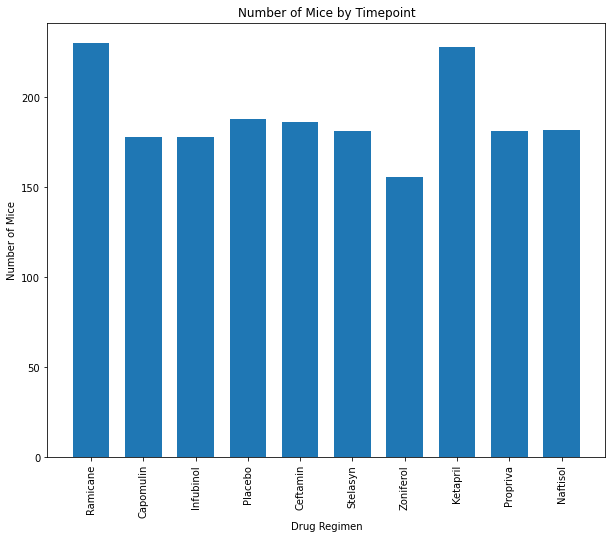

In [166]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize= (10,8)) 
plt.bar(drugs,timepoints_df1["Timepoint"], width = .7)
plt.xticks(drugs, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice by Timepoint")

Text(0, 0.5, '')

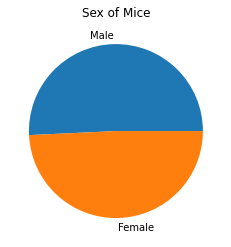

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = merged_df["Sex"].value_counts()
sex_label = merged_df["Sex"].unique()
sex.plot(kind="pie")
plt.title("Sex of Mice")
plt.ylabel("")

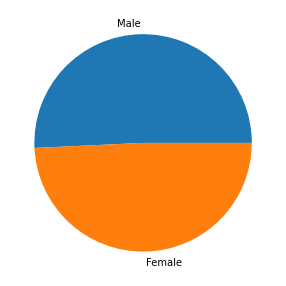

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize = (5,5))
plt.pie(sex, labels = sex_label)
plt.show()

## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = merged_df.groupby("Mouse ID").max()
greatest["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_2 = pd.merge(merged_df,greatest["Timepoint"], on = ["Mouse ID", "Timepoint"], how = "right")

merged_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [170]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_2["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq 
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treat_1 = merged_2.loc[merged_2["Drug Regimen"] == treatment]
    Tum_vol.append(treat_1["Tumor Volume (mm3)"])
Tum_vol


[1      23.343598
 2      28.484033
 3      28.430964
 6      30.485985
 10     31.023923
 12     31.896238
 13     32.377357
 14     33.329098
 16     34.455298
 20     37.311846
 22     36.041047
 24     37.074024
 28     38.846876
 30     38.939633
 31     38.982878
 32     38.753265
 34     38.125164
 35     39.952347
 36     40.658124
 37     40.159220
 38     40.728578
 39     41.483008
 40     41.581521
 45     47.685963
 181    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 49     67.973419
 50     65.525743
 57

In [171]:

# Determine outliers using upper and lower bounds
quartiles_C = Tum_vol[0].quantile([.25,.5,.75])
lowerq_C = quartiles_C[0.25]
upperq_C = quartiles_C[0.75]
iqr_C = upperq_C - lowerq_C 
upper_bound_C = upperq_C + (1.5*iqr_C)
lower_bound_C = lowerq_C - (1.5*iqr_C)

quartiles_R = Tum_vol[0].quantile([.25,.5,.75])
lowerq_R = quartiles_C[0.25]
upperq_R = quartiles_C[0.75]
iqr_R = upperq_R - lowerq_R 
upper_bound_R = upperq_R + (1.5*iqr_R)
lower_bound_R = lowerq_R - (1.5*iqr_R)

quartiles_I = Tum_vol[0].quantile([.25,.5,.75])
lowerq_I = quartiles_C[0.25]
upperq_I = quartiles_C[0.75]
iqr_I = upperq_I - lowerq_I 
upper_bound_I = upperq_I + (1.5*iqr_I)
lower_bound_I = lowerq_I - (1.5*iqr_I)

quartiles_Ce = Tum_vol[0].quantile([.25,.5,.75])
lowerq_Ce = quartiles_C[0.25]
upperq_Ce = quartiles_C[0.75]
iqr_Ce = upperq_Ce - lowerq_Ce 
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)

print(f"For {treatments[0]}, possible outliers are above {upper_bound_C} and below {lower_bound_C}")
print(f"For {treatments[1]}, possible outliers are above {upper_bound_R} and below {lower_bound_R}")
print(f"For {treatments[2]}, possible outliers are above {upper_bound_I} and below {lower_bound_I}")
print(f"For {treatments[3]}, possible outliers are above {upper_bound_Ce} and below {lower_bound_Ce}")

For Capomulin, possible outliers are above 51.83201549 and below 20.70456164999999
For Ramicane, possible outliers are above 51.83201549 and below 20.70456164999999
For Infubinol, possible outliers are above 51.83201549 and below 20.70456164999999
For Ceftamin, possible outliers are above 51.83201549 and below 20.70456164999999


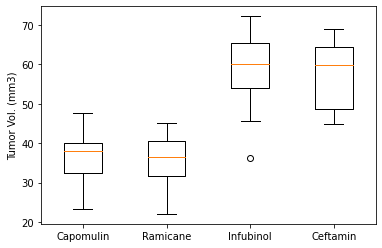

In [172]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(Tum_vol)
plt.xticks([1, 2, 3, 4], [treatments[0], treatments[1], treatments[2], treatments[3]])
plt.ylabel("Tumor Vol. (mm3)")
plt.show()

## Line and Scatter Plots

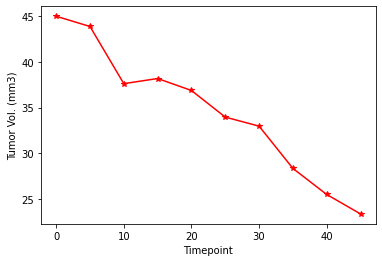

In [173]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = merged_df[merged_df["Mouse ID"]=="s185"]
xaxis = line_df["Timepoint"]
yaxis = line_df["Tumor Volume (mm3)"]
plt.plot(xaxis, yaxis, marker = "*", color = "r")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol. (mm3)")



plt.show()

For mouse s185 the Capumolin drug appeared to work, reducing the tumor from 45 mm3 to under 25 mm3

Text(0, 0.5, 'Tumor Vol. (mm3)')

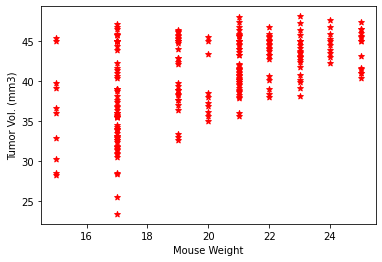

In [174]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = merged_df[merged_df["Drug Regimen"]=="Capomulin"]
xaxis = scatter_df["Weight (g)"]
yaxis = scatter_df["Tumor Volume (mm3)"]
plt.scatter(xaxis, yaxis, marker = "*", color = "r")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Vol. (mm3)")

## Correlation and Regression

y = 0.96x + 21.49


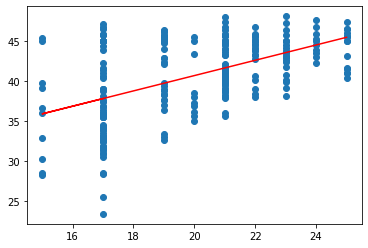

In [175]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_values = scatter_df["Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

In [180]:
    corr = pearsonr(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)"])
print(f"Pearson Correlation: {corr}")

Pearson Correlation: (0.525699555207717, 9.605446629502006e-18)


A Pearson Coeficient of 0.526 is a fairly strong positive correlation.